In [32]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut # use this lib
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold  # or just kfold with n 
from sklearn.metrics import mean_squared_error # MSE calculation (guess,true)
import statistics #use statistics.stdev(list)

In [54]:


mu, sigma = 0, 1 # mean and standard deviation
x = np.random.normal(mu, sigma, 100)
y = np.random.normal(mu, sigma, 100) #rnorm

<class 'numpy.ndarray'>


In [34]:
index = 0 
for i in x :
    y_i = i - 2 * i**2 
    y_i = y[index] + y_i # plus rnorm
    y[index] = y_i
    index += 1 


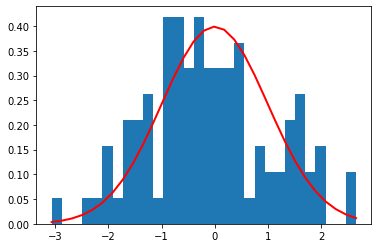

In [35]:
# Verify X
count, bins, ignored = plt.hist(x, 30, density=True)

plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

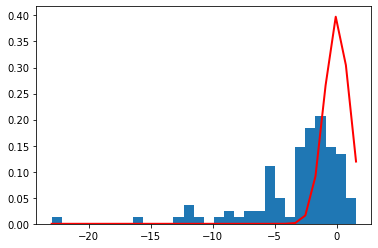

In [36]:
# Verify Y
count, bins, ignored = plt.hist(y, 30, density=True)

plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

In [48]:
# Setting up comparision values
x_2_base = []
x_3_base = []
x_4_base = []
for i in range(0, len(x)):
    x_2_base.append(x[i] ** 2)
    x_3_base.append(x[i] ** 3)
    x_4_base.append(x[i] ** 4) 
    
x_2 = np.array([x, x_2_base])
x_3 = np.array([x, x_2_base, x_3_base])
x_4 = np.array([x, x_2_base, x_3_base, x_4_base])

# x_2 = []
# x_3 = []
# x_4 = []
# for i in range(0, len(x)): 
#     x_2.append(x[i] + x[i]**2)
# for i in range(0, len(x)): 
#     x_3.append(x_2[i] + x[i]**3)
    
# for i in range(0, len(x)): 
#     x_4.append(x_3[i] + x[i]**4)
# x_2 = np.array(x_2)
# x_3 = np.array(x_3)
# x_4 = np.array(x_4)
# print(type(x_2))
# print(type(x))
# #print(x_3_base) 


In [52]:
def LOOCV(x,y):
    #print(y)
    MSE , STD_DEV = 0 ,0
    linReg = LinearRegression()

    # leave one out
    loocv = LeaveOneOut()

    #number of splits
    loocv.get_n_splits(x) 
    x_test_mse_list = []
    y_test_mse_list = []
    y_pred_lst = []
    
    try:
        ## has columns
        #print(x[0][0])
        for i in x :
            ### TODO 
            for train_index, test_index in loocv.split(i): 
                X_train, X_test = i[train_index], i[test_index]
                y_train, y_test = y[train_index], y[test_index]   
#                 print("X_train : " , X_train,"\nX_test:",  X_test, "\n y_train :", y_train, "\n y_test", y_test)
                linReg.fit(X_train.reshape(-1, 1), y_train)
                predict = linReg.predict(X_test.reshape(-1, 1))
                x_test_mse_list.append(X_test)
                y_test_mse_list.append(y_test) 
                y_pred_lst.append(predict)
#         MSE = mean_squared_error(y_test_mse_list, y_pred_lst) 
#         print("column " ,MSE)
#         return MSE

            
    except:
        # single column
        for train_index, test_index in loocv.split(x): 
            X_train, X_test = x[train_index], x[test_index]
            y_train, y_test = y[train_index], y[test_index]    
            linReg.fit(X_train.reshape(-1, 1), y_train)
            predict = linReg.predict(X_test.reshape(-1, 1)) 
#             print("X_train : " , X_train,"\nX_test:",  X_test, "\n y_train :", y_train, "\n y_test", y_test)
            x_test_mse_list.append(X_test)
            y_test_mse_list.append(y_test) 
            y_pred_lst.append(predict) 

    MSE = mean_squared_error(y_test_mse_list, y_pred_lst) 
#     print(MSE) 
    return MSE


In [53]:

x1_mse  = LOOCV(x  , y)
x2_mse  = LOOCV(x_2, y)
x3_mse  = LOOCV(x_3, y)
x4_mse  = LOOCV(x_4, y)


print("x1 : ",x1_mse)
print("x2 : ",x2_mse)
print("x3 : ",x3_mse)
print("x4 : ",x4_mse)



x1 :  15.247909406047418
x2 :  9.051634889078853
x3 :  11.673970471331907
x4 :  9.952449740354645


In [40]:
def count_mse(x,y):
    #print(y)
    MSE , STD_DEV = 0 ,0
    
    # leave one out
    loocv = LeaveOneOut()

    #number of splits
    loocv.get_n_splits(x) 
    x_test_mse_list = []
    y_test_mse_list = []
    
    try:
        ## has columns
#         print(x[0][0])
        for i in x :
            ### TODO 
            for train_index, test_index in loocv.split(i): 
                X_train, X_test = i[train_index], i[test_index]
                y_train, y_test = y[train_index], y[test_index]   
#                 print("X_train : " , X_train,"\nX_test:",  X_test, "\n y_train :", y_train, "\n y_test", y_test)
                x_test_mse_list.append(X_test)
                y_test_mse_list.append(y_test)
            
    except:
        # single column
        for train_index, test_index in loocv.split(x): 
            X_train, X_test = x[train_index], x[test_index]
            y_train, y_test = y[train_index], y[test_index]   
#             print("X_train : " , X_train,"\nX_test:",  X_test, "\n y_train :", y_train, "\n y_test", y_test)
            x_test_mse_list.append(X_test)
            y_test_mse_list.append(y_test)
    #print(y_test_mse_list)
    
    std_dev_list = []  
    x_test_mse_list = np.asarray(x_test_mse_list) 
    is_column = False
    for i in range(0 , len(x_test_mse_list)): 
        try:
            std_dev_list_columns = []
            for x in range(0 , len(x_test_mse_list[i])): 

                for q in range(0, len(x_test_mse_list[i][x])): 
                    std_dev_list_columns.append(x_test_mse_list[i][x][q])
            std_dev_list.append(std_dev_list_columns)
        except:
            std_dev_list.append(x_test_mse_list[i][0])
            is_column = True
            pass
         
    #print("is column?" , is_column)
    if is_column is False:
        mean_square_error_list = []
        for i in std_dev_list: 
            #print("i", i , "\ny_test_mse_list" , y_test_mse_list)
            mean_square_error_list.append(mean_squared_error(i, y_test_mse_list)) 
        MSE = sum(mean_square_error_list) / len(mean_square_error_list)
    else: 
        #print("std_dev_list" , std_dev_list , "\ny_test_mse_list" , y_test_mse_list)
        MSE = mean_squared_error(std_dev_list, y_test_mse_list)
    print(MSE)
    return MSE, STD_DEV
# x2_mse , x2_std_dev = count_mse(x_2, y)

#x1_mse , x1_std_dev = count_mse(x,y)

In [41]:
x1_mse , x1_std_dev = count_mse(x,y)

23.27766285723733


In [42]:
x2_mse , x2_std_dev = count_mse(x_2, y) 

49.458800221633616


In [43]:
x3_mse , x3_std_dev = count_mse(x_3, y)

66.61517916539374


In [44]:
x4_mse , x4_std_dev = count_mse(x_4, y)

375.67775979394435


In [45]:
def count_mse_new(x, y):
    MSE = 0
    
    loocv = LeaveOneOut()
    
#     print(loocv.get_n_splits(x) )
    has_columns = False
    try:
    # Solves x2
#         print(x[0][0]) 
        has_columns = True 
        all_x_test_lst = []
        y_test_lst = []
        y_has_value = False
        for columns in x: 
            x_test_lst = []
#             print( "Length of Columns " , loocv.get_n_splits(columns) ) 
            for train_index, test_index in loocv.split(columns): 
                 
                X_train, X_test = columns[train_index], columns[test_index]
                y_train, y_test = y[train_index], y[test_index]   
#                 print("X_train : " , X_train,"\nX_test:",  X_test, "\n y_train :", y_train, "\n y_test", y_test)
                x_test_lst.append(X_test)
    
                if y_has_value is False:
                    y_test_lst.append(y_test) 
            y_has_value = True
            all_x_test_lst.append(x_test_lst) 
#         print("all_x_test_lst" , all_x_test_lst[0]) 
#         print("all_x_test_lst" , all_x_test_lst[1]) 
#         print("y_test_lst" , y_test_lst)
        print(len(all_x_test_lst))
    
        
        
#         print(calculateMSEAddition(all_x_test_lst,y_test_lst ))
#         print(calculateMSEAverage(all_x_test_lst,y_test_lst ))
        MSE = calculateMSEAverage(all_x_test_lst,y_test_lst )
        print(MSE)

#         cumulate_MSE = []
#         for i in all_x_test_lst:
#             temp_mse = mean_squared_error(i, y_test_lst) 
#             cumulate_MSE.append(temp_mse)
#         temp_MSE = sum(cumulate_MSE) / len(cumulate_MSE)
#         print(temp_MSE)
    
#         # Calculate MSE 
#         #real_x is cumulated from x1~x4
#         real_x = []
# #         print(len(all_x_test_lst))
#         for rows in range(0, len(all_x_test_lst[0])): 
#             local_total = 0
#             for columns in range(0, len(all_x_test_lst)):
#                 local_total +=  all_x_test_lst[columns][rows]
# #             real_x.append(local_total/ (len(all_x_test_lst)))
#             real_x.append(local_total)
# #         print(len(real_x))
# #         print("real_x",real_x)
# #         print("y_test_list" , y_test_lst)
# #         print("len(all_x_test_lst)" , len(all_x_test_lst))
#         MSE = mean_squared_error(real_x, y_test_lst) 
    
        
    # Solves x1
#     except Exception as e:
    except Exception as e: 
        x_test_lst = []
        y_test_lst = []
        for train_index, test_index in loocv.split(x): 
                 
            X_train, X_test = x[train_index], x[test_index]
            y_train, y_test = y[train_index], y[test_index]   
#             print("X_train : " , X_train,"\nX_test:",  X_test, "\n y_train :", y_train, "\n y_test", y_test)
            x_test_lst.append(X_test)
            y_test_lst.append(y_test)
        MSE = mean_squared_error(x_test_lst, y_test_lst)
        print(MSE)
#         print(e)
    
    print("\n")
    return MSE
# x1_mse  = count_mse_new(x,y)
# x2_mse  = count_mse_new(x_2, y)
# x3_mse  = count_mse_new(x_3, y)
# x4_mse  = count_mse_new(x_4, y)

In [46]:
def calculateMSEAddition(all_x_test_lst,y_test_lst ):
    real_x = [] 
    for rows in range(0, len(all_x_test_lst[0])): 
        local_total = 0
        for columns in range(0, len(all_x_test_lst)):
            local_total +=  all_x_test_lst[columns][rows]
#             real_x.append(local_total/ (len(all_x_test_lst)))
        real_x.append(local_total) 
    MSE = mean_squared_error(real_x, y_test_lst) 
    return MSE


In [47]:
def calculateMSEAverage(all_x_test_lst , y_test_lst):
    cumulate_MSE = []
    for i in all_x_test_lst:
        temp_mse = mean_squared_error(i, y_test_lst) 
        cumulate_MSE.append(temp_mse)
    temp_MSE = sum(cumulate_MSE) / len(cumulate_MSE)
#     print(temp_MSE)
        
    
    return temp_MSE